# Deep learning project - Group 19



*   Tatu Iivarinen, snr 2036387
*   Milan Stanisic, snr 2035632
*   Katiuscka van Veen, snr 2037169
*   Xin Liu, snr 2034081





'''

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#!pip install torch
#!pip install torchsummary
#!pip install torchvision
import torch
import torchsummary
import torchvision

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv1DTranspose
from tensorflow.keras.constraints import max_norm
import math

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle
import numpy as np

In [ ]:
os.chdir('/content/gdrive/MyDrive/Deep learning')

os.getcwd()

'/content/gdrive/MyDrive/Deep learning'

In [ ]:
with open("/content/gdrive/MyDrive/Deep learning/denoise_dataset.pkl", 'rb') as pickle_file:
    content = pickle.load(pickle_file)




# content[0]
# content[1]
# =>
# [originals, noisy]

#content = np.array(content) # convert array to numpy array

11000
9600
9600
2
[ 0.17554186  0.24969758  0.56492269 ...  0.41748863  0.52546203
 -0.63627768]
[ 0.26338798  0.31439558  0.37133926 ...  0.06959011 -0.03745244
  0.00937267]

sdifhjuikosd (9600, 11000)
(9600, 5500)


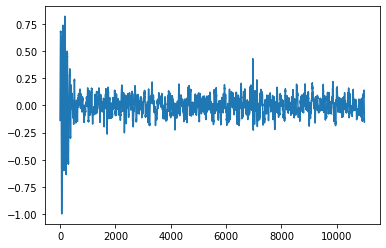

In [ ]:
print(len(content[0][0]))
print(len(content[0]))
print(len(content[1]))
print(len(content))

print(content[1][0])
print(content[0][0])
print()




print("sdifhjuikosd", content[0].shape)
print(content[1].shape)

df = pd.DataFrame(content[0][:, 5500:11000])
df

#plt.plot(content[0][0])
#plt.plot(content[0][5])
figure = plt.plot(content[0][69]) # 18 f.e. = ???

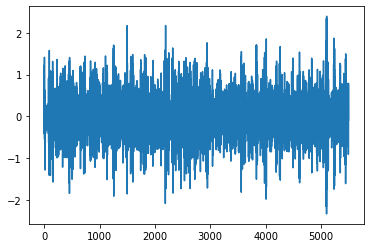

In [ ]:
plt.plot(content[1][100])

In [ ]:
df = pd.DataFrame(content[0])
df

,0,1,2,3,4,5,6,7,8,9,...,10990,10991,10992,10993,10994,10995,10996,10997,10998,10999
0,0.263388,0.314396,0.371339,0.386401,0.402741,0.454021,0.445289,0.469095,0.501208,0.484864,...,0.032425,0.132019,-0.105139,0.090813,-0.075956,0.136646,-0.146399,0.069590,-0.037452,0.009373
1,-0.012816,-0.007203,-0.074184,0.080158,-0.024759,0.067499,-0.124089,0.114451,-0.000997,0.081829,...,0.359868,0.430014,0.506571,0.570588,0.630872,0.667593,0.696428,0.678495,0.636454,0.566453
2,-0.001355,-0.009982,-0.009758,-0.011721,-0.005935,-0.005983,0.004087,0.001565,-0.003909,0.001991,...,-0.031152,-0.062947,-0.087004,-0.089937,-0.076184,-0.054406,-0.012623,0.031402,0.094473,0.169075
3,-0.467459,-0.421449,-0.356038,-0.318829,-0.266255,-0.193270,-0.140366,-0.096492,-0.056223,-0.031855,...,-0.251836,-0.221325,-0.177898,-0.129177,-0.106864,-0.092740,-0.051009,-0.025709,-0.024904,-0.022425
4,0.009042,-0.003267,-0.007513,-0.011028,0.015581,0.008836,0.006966,-0.002472,0.008091,0.005762,...,-0.003293,-0.145867,0.118018,0.047914,-0.113654,-0.006800,-0.029298,0.132664,-0.177918,-0.004699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,0.259943,0.319865,0.473743,0.590693,0.617947,0.546817,0.470117,0.216459,0.088548,-0.123381,...,0.031424,0.106859,0.120257,0.119580,0.161900,0.159682,0.147159,0.044815,0.002030,-0.028287
9596,-0.553127,-0.124203,0.219460,0.453083,0.584924,0.584309,0.631471,0.759382,0.734882,0.621816,...,-0.070051,-0.072363,-0.072579,-0.087804,-0.100175,-0.106455,-0.102989,-0.086959,-0.079037,-0.064622
9597,0.012849,0.008507,0.012540,0.004418,-0.003788,-0.009371,-0.017665,-0.025361,-0.042349,-0.041783,...,0.129376,0.221407,0.257192,0.274933,0.265620,0.274289,0.288042,0.273391,0.182307,0.060176
9598,0.231599,0.192585,0.226318,0.208544,0.219752,0.210612,0.226701,0.267421,0.249365,0.229023,...,0.003008,0.007779,0.008510,0.011930,0.027964,0.021667,0.027578,0.012303,0.005512,0.016884


In [ ]:
with open("/content/gdrive/MyDrive/Deep learning/denoise_testset_noisy.pkl", 'rb') as noisy_pickle_file: #import the noisy version of the dataset
    content_noisy = pickle.load(noisy_pickle_file)


df = pd.DataFrame(content_noisy)
df

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,-0.007339,1.250683,-0.173878,-0.909774,0.221460,0.562753,-0.125387,-0.281374,0.042754,-0.015893,...,0.520162,0.446138,-1.210781,-0.398192,1.487268,-0.332988,-1.256962,0.728245,0.434384,-0.818373
1,-0.296211,2.824371,-1.406133,-1.085830,2.359860,0.782332,-0.021149,1.615637,0.326850,-0.853936,...,-0.601620,-0.846376,1.515100,0.047814,-1.272435,0.580082,0.305561,0.004420,0.130335,-0.948670
2,-0.449760,-1.022146,-0.215303,0.282441,0.304775,0.223310,-0.759252,-0.427867,0.646903,-0.644576,...,-0.796048,-0.327707,0.431691,-0.057339,0.286551,0.102260,-0.960110,0.028042,0.899367,-0.111775
3,0.122151,1.246179,0.413711,-0.850943,-0.805182,0.939184,0.723087,-0.868540,-0.117416,0.194185,...,0.287793,0.356759,1.499293,-0.746873,-0.468031,2.180520,0.515486,-0.607532,1.331964,0.063431
4,-0.058500,0.980946,-0.507278,-0.405637,0.273626,0.091063,0.731289,-0.280445,-1.055889,0.817698,...,0.605477,0.303299,-0.140856,-0.284300,-0.189782,-0.588069,-0.941365,0.009866,0.156426,1.014614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.145026,1.644770,-0.217085,-1.351395,0.677368,1.384352,-0.831726,-0.872803,1.434400,0.585209,...,0.010319,-0.005111,0.048170,-0.196707,-0.767036,-1.020942,-0.235955,0.677078,-0.259527,-0.588844
316,0.017956,-0.507952,0.322483,0.330400,-0.176714,0.115688,-0.286128,0.123291,0.253915,-0.403505,...,0.499698,0.104286,-0.110647,0.315399,-0.229338,-0.118119,0.291042,-0.043646,0.220028,0.067971
317,-0.055282,0.984047,0.272994,-0.677389,-0.327166,0.123828,0.379554,0.469094,-0.434048,-0.776895,...,-0.636162,0.468595,0.014070,0.638136,0.094375,-0.874510,-0.367572,0.450750,0.934285,-0.017035
318,0.145347,0.790295,0.543236,-0.375843,-0.611010,-0.242420,0.157390,0.857666,0.391417,-1.088575,...,-0.553059,-0.057488,0.721060,-0.363776,-0.378609,0.733331,0.252906,-0.735108,0.044745,0.194335


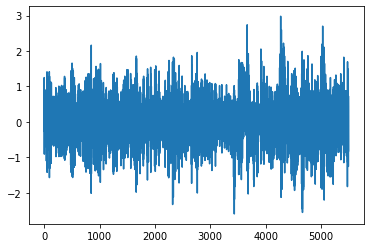

In [ ]:
plt.plot(content_noisy[0])

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))

Device: cpu


In [ ]:
# Model configuration
input_shape = (11000, 1)
batch_size = 32 #try 64 later maYBE
no_epochs = 5 # goes through the dataset this many times, we can change this value later blabla

train_test_split = 0.2
validation_split = 0.2

verbosity = 1
max_norm_value = 2.0 # could try something else

In [ ]:
#!pip install sklearn
import sklearn
from sklearn.model_selection import train_test_split

# Our data:

# content[0] = clean data
# content[1] = data with noise
print(len(content[0]))
print(len(content[1]))

# into 80% training and 20% test set
X_train, X_test, y_train, y_test = train_test_split(content[1], content[0], test_size=0.2, random_state=1)

# also make a validation set
# now 60% training, 20% validation, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


9600
9600


In [ ]:
# Currently no normalization for our data. The data seems to be normalized already and further normalizations will depend on our loss function requirements.
print(content_noisy.shape)

(320, 5500)


In [ ]:
from scipy import signal

fourier_spectra_noisy_double = signal.resample(content[1], num = 11000, axis = 1)
print(fourier_spectra_noisy_double.shape)
fourier_spectra_test_double = signal.resample(content_noisy, num = 11000, axis = 1)
print(fourier_spectra_test_double.shape)

(9600, 11000)
(320, 11000)


In [ ]:
#FOURIER TRANSFORM OF SIGNALS
len(content[1][321])

X = np.fft.rfft(content[1][321])
print(len(X))

sr = len(content[1][321])

def signal_transform(signal): #, f_ratio=1): #we should provide a source for the code snippet that we copied from the internet - WHERE DID WE GET THIS SHIT FROM
    X = np.fft.rfft(signal)
    X_mag = np.absolute(X) #stores the absolute magnitudes of Fourier spectra
    return X_mag
  
#print(len(content[0]))
#print(len(content[0][0]))

#empty arrays that will keep fourier spectra
fourier_spectra_noisy = np.zeros((9600, 2751)) 
fourier_spectra_clean = np.zeros((9600, 5501))

fourier_spectra_test = np.zeros((320, 2751))

for x in range(2): #transforming the original audio signals into Fourier spectra and saving them in separate arrays. 
  for y in range(9600):
    if x == 0:
      fourier_spectra_clean[y, :] = signal_transform(content[x][y])
    else:
      fourier_spectra_noisy[y, :] = signal_transform(content[x][y])
      
for x in range(320):
  fourier_spectra_test[x, :] = signal_transform(content_noisy[x])


print(fourier_spectra_test[0])
#PLOTTING - SUBSTITUTE VARIABLES BEFORE USING 
"""
plt.figure(figsize=(18, 5))
    
    f = np.linspace(0, sr, len(X_mag))
    #f_bins = int(len(X_mag)*f_ratio)  
    
    plt.plot(f, X_mag)#[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)
"""

2751
[19.44894866 40.88050611 26.18270515 ...  5.68724481  3.52063623
  1.66337356]


"\nplt.figure(figsize=(18, 5))\n    \n    f = np.linspace(0, sr, len(X_mag))\n    #f_bins = int(len(X_mag)*f_ratio)  \n    \n    plt.plot(f, X_mag)#[:f_bins])\n    plt.xlabel('Frequency (Hz)')\n    plt.title(title)\n"

(9600, 5501)


Text(0.5, 1.0, 'finally working')

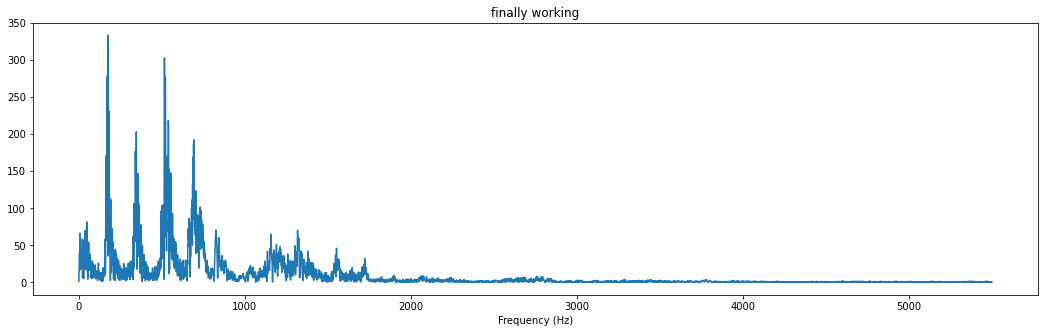

In [ ]:

plt.figure(figsize=(18, 5))
print(fourier_spectra_clean.shape)
f = np.linspace(0, sr, fourier_spectra_clean[1].shape[0])
f_bins = int(len(fourier_spectra_clean[1]))  
    
plt.plot(f, fourier_spectra_clean[186])#[:f_bins])
plt.xlabel('Frequency (Hz)')
plt.title('finally working')


In [ ]:
from scipy import signal

fourier_spectra_noisy_double = signal.resample(fourier_spectra_noisy, num = 5501, axis = 1)
print(fourier_spectra_noisy.shape)
fourier_spectra_test_double = signal.resample(fourier_spectra_test, num = 5501, axis = 1)
print(fourier_spectra_test.shape)



(9600, 2751)
(320, 2751)


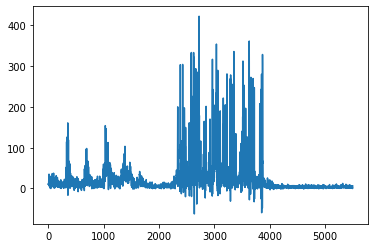

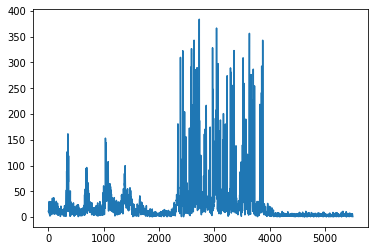

In [ ]:
f = np.linspace(0, sr, fourier_spectra_noisy_double[1].shape[0]) #checking if upsampling went okay
plt.figure()
plt.plot(f, fourier_spectra_noisy_double[186])

plt.figure()
f = np.linspace(0, sr, fourier_spectra_noisy[1].shape[0])
plt.plot(f, fourier_spectra_noisy[186])


In [ ]:
from torch import nn, optim
model = nn.Sequential()
#new layer
model.add_module('Convo1', nn.Conv1d(in_channels = 1, out_channels = 16, kernel_size = 25))
model.add_module('Act1', nn.ReLU())
model.add_module('MaxPool1', nn.MaxPool1d(kernel_size = 25))
#new layer
model.add_module('Convo3', nn.Conv1d(in_channels = 16, out_channels = 32, kernel_size = 25))
model.add_module('Act2', nn.ReLU())
#Fully connected layers
#new layer
model.add_module('Linear1', nn.Linear(in_features = 195, out_features = 55, bias = True)) 
model.add_module('Act_l1', nn.ReLU())
#dropout
model.add_module('Dropout', nn.Dropout(p = 0.5))
#new layer
model.add_module('Linear2', nn.Linear(in_features = 55, out_features = 5501, bias = True))
model.add_module('Softmax', nn.ReLU())

model.to(device)

Sequential(
  (Convo1): Conv1d(1, 16, kernel_size=(25,), stride=(1,))
  (Act1): ReLU()
  (MaxPool1): MaxPool1d(kernel_size=25, stride=25, padding=0, dilation=1, ceil_mode=False)
  (Convo3): Conv1d(16, 32, kernel_size=(25,), stride=(1,))
  (Act2): ReLU()
  (Linear1): Linear(in_features=195, out_features=55, bias=True)
  (Act_l1): ReLU()
  (Dropout): Dropout(p=0.5, inplace=False)
  (Linear2): Linear(in_features=55, out_features=5501, bias=True)
  (Softmax): ReLU()
)

In [ ]:
from torchsummary import summary
in_shape = (1, 5501)
summary(model, input_size=in_shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1             [-1, 16, 5477]             416
              ReLU-2             [-1, 16, 5477]               0
         MaxPool1d-3              [-1, 16, 219]               0
            Conv1d-4              [-1, 32, 195]          12,832
              ReLU-5              [-1, 32, 195]               0
            Linear-6               [-1, 32, 55]          10,780
              ReLU-7               [-1, 32, 55]               0
           Dropout-8               [-1, 32, 55]               0
            Linear-9             [-1, 32, 5501]         308,056
             ReLU-10             [-1, 32, 5501]               0
Total params: 332,084
Trainable params: 332,084
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 4.19
Params size (MB): 1.27
Estimated T

In [ ]:
#importing tensorflow
import tensorflow as tf

In [ ]:
#Data conversion and preparation
X_train, X_test, y_train, y_test = train_test_split(fourier_spectra_noisy_double, fourier_spectra_clean, test_size=0.2, random_state=1)


noise_formatted_training = np.zeros((1024, 1, 5501))
clean_formatted_training = np.zeros((1024, 1, 5501))
noise_formatted_test = np.zeros((320, 1, 5501))
#clean_formatted_test = np.zeros((256, 1, 5501))

for x in range(noise_formatted_training.shape[0]):
  noise_formatted_training[x, 0, :] = X_train[x, :]
  clean_formatted_training[x, 0, :] = y_train[x, :]

for x in range(noise_formatted_test.shape[0]):
  noise_formatted_test[x, 0, :] = fourier_spectra_test_double[x, :]
  #clean_formatted_test[x, 0, :] = y_test[x, :]


train_data = np.zeros((2, 1024, 1, 5501))
train_data[0] = noise_formatted_training
train_data[1] = clean_formatted_training

train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)

test_data = np.zeros((320, 1, 5501))
test_data = noise_formatted_test
#test_data[1] = clean_formatted_test

test_loader = torch.utils.data.DataLoader(test_data, batch_size = 320, shuffle = True)



In [ ]:
optimizer = optim.RMSprop(model.parameters(), lr=0.001) 
#enumerated_train_loader = enumerate(train_loader)
loss_function = nn.MSELoss()

In [ ]:
loss_function_values = []
for epoch in range(20):
  print("Epoch: {}".format(epoch))
  #training
  model.train()
  for noisy, clean in train_loader:
    noisy = noisy.to(torch.float32)
    clean = clean.to(torch.float32)
    

    noisy = noisy.to(device)
    clean = clean.to(device)

    optimizer.zero_grad()
    predictions = model(noisy)
    loss = loss_function(predictions, clean)
    loss.backward()
    optimizer.step()

    
  loss_function_values.append(loss)
  #testing
  model.eval() 
  for noisy in test_loader: 
    noisy = noisy.to(torch.float32)
    #clean = clean.to(torch.float32)

    noisy = noisy.to(device)
    #clean = clean.to(device)

    predictions = model(noisy)
  accuracy = torch.sum(predictions == clean)/256
  print("Accuracy: {}".format(accuracy))



Epoch: 0


KeyboardInterrupt: ignored

torch.Size([320, 32, 5501])


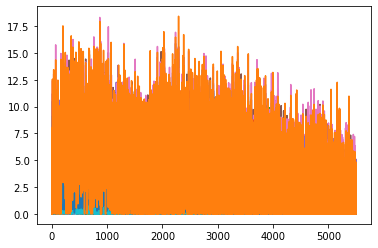

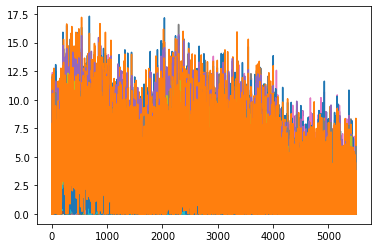

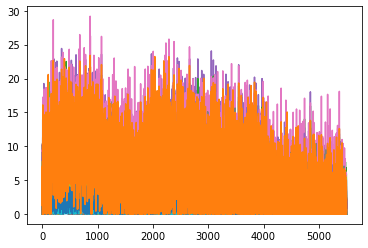

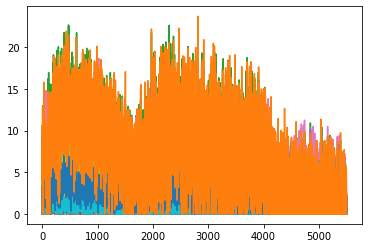

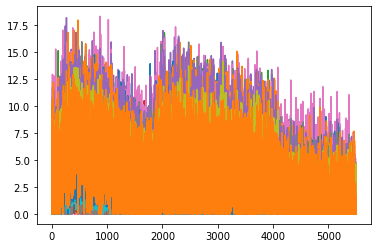

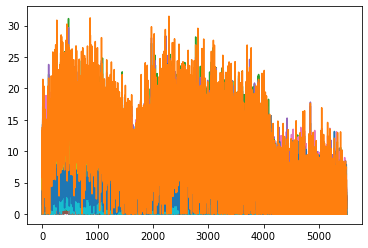

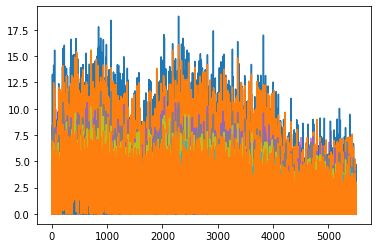

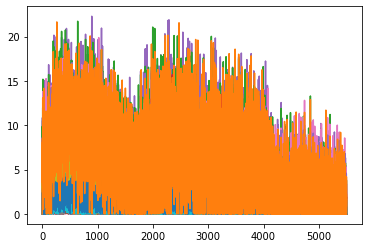

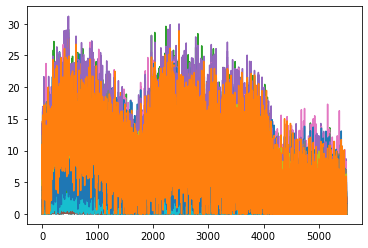

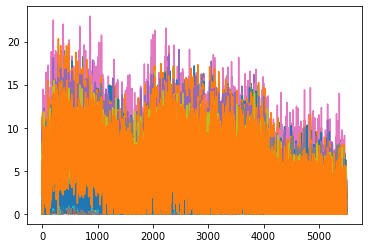

In [ ]:
print(predictions.shape)
f = f = np.linspace(0, sr, predictions[1].shape[1])

#clean_fixed = clean.detach().numpy()
predictions_fixed = predictions.detach().numpy()
for y in range(10):
  plt.figure()
  #plt.plot(f, clean_fixed[y, 0])
  for x in range(32):
    plt.plot(f, predictions_fixed[y, x])
  



In [ ]:
#saving the output array to avoid working in this python notebook because it is glitchy
with open("outputarray.txt", "w+") as file:
  for entry in range(predictions_fixed.shape[0]):
    collective_sum = np.zeros(5501)
    collective_sum = np.sum(predictions_fixed[entry], axis = 0)
    file.write("[ ")
    for x in range(collective_sum.shape[0]):
      if x == 5500:
        file.write(str(collective_sum[x]))
        break
      file.write(str(collective_sum[x])+ ", ")
    file.write("]")
    file.write("\n")